In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%cd ..

/Users/naomichi/repos/src/github.com/agatan/ocr-experiments


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from ocr.preprocessing.generator import CSVGenerator
from ocr.models import resnet50, bboxnet, mobilenet
from ocr.data import process

/Users/naomichi/.pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
tf.keras.backend.set_session(tf.InteractiveSession())
backbone, features_pixel = mobilenet.backbone(input_shape=(512, 832, 3))
training_model, prediction_model = bboxnet.create_model(backbone, features_pixel, input_shape=(512, 832, 3), n_vocab=process.vocab())
tf.keras.backend.get_session().run(tf.global_variables_initializer())
training_model.load_weights('./checkpoint-weights.h5', by_name=True)
# prediction_model.get_weights()

In [5]:
gen = CSVGenerator('./data/processed/validation/annotations.csv', features_pixel=features_pixel, input_size=(512, 832))
# gen = CSVGenerator('./data/processed/train/annotations.csv', features_pixel=features_pixel, input_size=(512, 832))
prediction_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              (None, 512, 832, 3)  0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 64, 104, 256) 3907264     image[0][0]                      
__________________________________________________________________________________________________
bbox (Conv2D)                   (None, 64, 104, 6)   1542        model[1][0]                      
__________________________________________________________________________________________________
confidence (Lambda)             (None, 64, 104)      0           bbox[0][0]                       
__________________________________________________________________________________________________
box (Lambd

In [6]:
x, y = next(gen.batches(batch_size=4))
images = x[0]
boxes, text = prediction_model.predict(images)

050515150515101
010151515151510151
0515101016161050515151
505101515151051
0505151510101010506105151


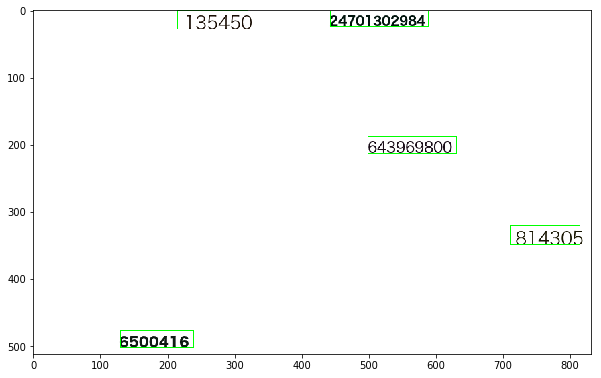

051015101010151505051510
51510151515151505151015151
050101515151515151010
01015151515051515101016
050515150505015105051515151
5015151010
0510515050501
01010515101010101510105016
051015151515150515010516


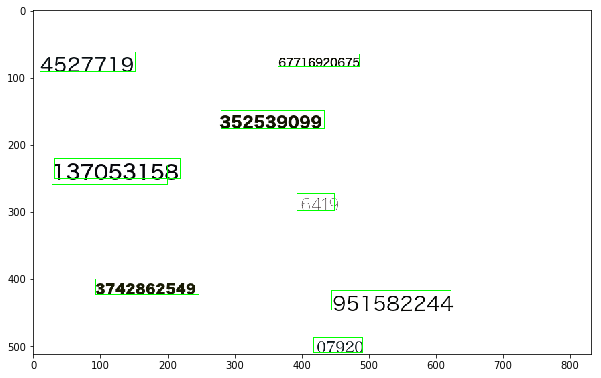

051510151510101515151510505
01015151051515161
0501015151605151


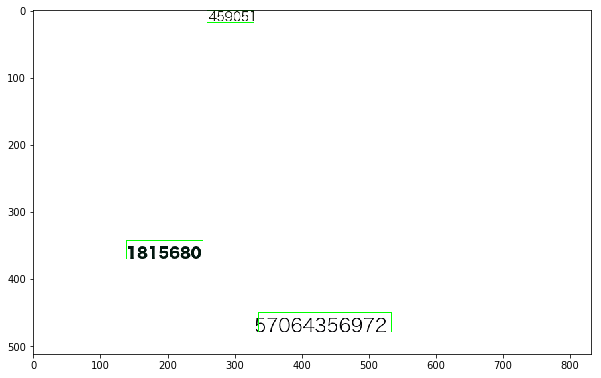

505151515151515151505151505016
050515051515151515151010501
051010151515151010105
5051505050101050515
5010515151505150515
505050105051515151
050101010516101015
515101050515101050151010
050505151505010601015


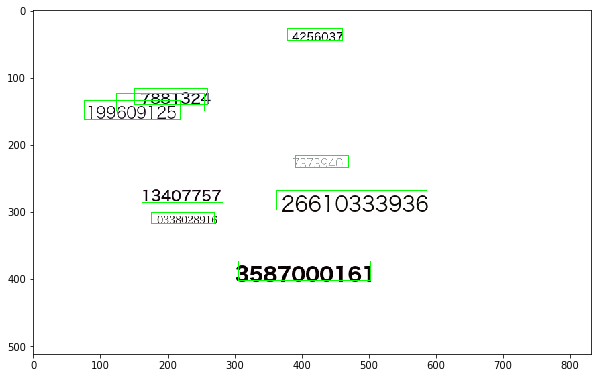

In [7]:
import random
import cv2
import math
import numpy as np
from itertools import groupby

images = x[0]

for i in range(len(images)):
    i_boxes = boxes[i]
    i_text = text[i]
    for ts in i_text:
        decoded = []
        for t in ts:
            if t == -1:
                break
            decoded.append(process.idx2char(t))
        if decoded:
            print(''.join(decoded))
    target = (images[i].copy() * 255).astype(np.int32)

    for (l, t, r, b) in i_boxes:
        cv2.rectangle(target, (l, t), (r, b), (0, 255, 0))

    plt.figure(figsize=(10, 10))
    plt.imshow(target)
    plt.show()

In [8]:
import time
start = time.time()
boxes, text = prediction_model.predict(images[0:1])
print(boxes.shape, text.shape)
print(time.time() - start)

(1, 32, 4) (1, 32, 51)
1.1317028999328613
